In [1]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit
import visuals as vs
%matplotlib inline

data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
data
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))
data.head()

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


Boston housing dataset has 489 data points with 4 variables each.


RM  LSTAT  PTRATIO      MEDV
0  6.575   4.98     15.3  504000.0
1  6.421   9.14     17.8  453600.0
2  7.185   4.03     17.8  728700.0
3  6.998   2.94     18.7  701400.0
4  7.147   5.33     18.7  760200.0

In [6]:

minimum_price = min(prices)

maximum_price = max(prices)

mean_price = sum(prices)/len(prices)

median_price = np.median(prices)

std_price = np.std(prices)

print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429474


In [17]:
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """

    score = make_scorer(r2_score)
    score = r2_score(y_true, y_predict)
    return score

In [18]:
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


In [19]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2)

print("Training and testing split was successful.")

Training and testing split was successful.


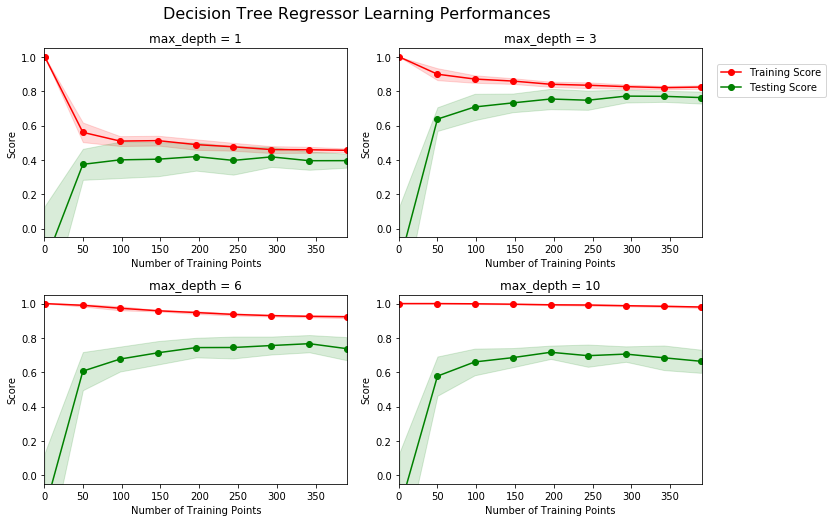

In [20]:
vs.ModelLearning(features, prices)

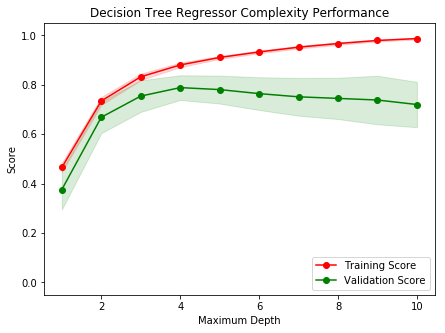

In [21]:
vs.ModelComplexity(X_train, y_train)

In [ ]:
from sklearn.ensemble import DecisionTreeRegressor

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    regressor = DecisionTreeClassifier()

    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    scoring_fnc = make_scorer()

    grid = grid_search(regressor,params,scoring_fnc,cv_sets)

    grid = grid.fit(X, y)

    return grid.best_estimator_

In [ ]:
reg = fit_model(X_train, y_train)

print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

In [ ]:
client_data = [[5, 17, 15], 
               [4, 32, 22], 
               [8, 3, 12]]  

for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

In [ ]:
vs.PredictTrials(features, prices, fit_model, client_data)